# Sprints 04 e 05

## Pré-processamento da base de dados

Instala biblioteca necessárias

In [27]:
pip install boto3 pandas scikit-learn matplotlib seaborn tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 3.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Importa bibliotecas essenciais

In [31]:
import boto3
import pandas as pd
import json
from decimal import Decimal
from io import StringIO
from time import sleep
from tqdm import tqdm

Define as credenciais de acesso aos serviços da AWS

In [37]:
session = boto3.Session()
credentials = session.get_credentials() 
access_key = credentials.access_key
secret_key = credentials.secret_key
token = credentials.token

Recupera dataset original do DynamoDB

In [35]:
dynamodb = boto3.resource('dynamodb', aws_access_key_id=access_key, aws_secret_access_key=secret_key, aws_session_token=token, region_name = 'us-east-1')
dynamodbTable = dynamodb.Table('HotelReservations')

lastEvaluatedKey = None
items = []

while True:
    if lastEvaluatedKey == None:
        response = dynamodbTable.scan()
    else:
        response = dynamodbTable.scan(
        ExclusiveStartKey=lastEvaluatedKey
    )

    items.extend(response['Items'])
    sleep(5)
    
    if 'LastEvaluatedKey' in response:
        lastEvaluatedKey = response['LastEvaluatedKey']
        print(len(items))
    else:
        break

dataset = json.dumps(items, default = float)
dataset = pd.read_json(StringIO(dataset))
dataset

2604
5208
7812
10416
13020
15624
18228
20832
23436
26040
28644
31248
33853


,no_of_previous_bookings_not_canceled,room_type_reserved,Booking_ID,no_of_children,repeated_guest,no_of_special_requests,no_of_adults,arrival_year,no_of_week_nights,type_of_meal_plan,booking_status,required_car_parking_space,market_segment_type,avg_price_per_room,arrival_date,no_of_weekend_nights,arrival_month,no_of_previous_cancellations,lead_time
0,0,Room_Type 1,INN21685,0,0,0,2,2017,1,Meal Plan 2,Not_Canceled,0,Offline,94.50,11,2,7,0,96
1,0,Room_Type 4,INN29506,0,0,1,2,2018,3,Meal Plan 1,Canceled,0,Online,105.83,24,1,10,0,267
2,0,Room_Type 1,INN21560,0,0,0,2,2018,2,Not Selected,Canceled,0,Online,85.50,1,0,7,0,142
3,0,Room_Type 1,INN24805,0,0,0,2,2018,4,Not Selected,Canceled,0,Online,95.03,2,1,5,0,102
4,0,Room_Type 1,INN30276,0,0,0,2,2018,2,Meal Plan 2,Canceled,0,Offline,101.00,13,1,5,0,309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,0,Room_Type 1,INN21370,0,0,0,2,2018,1,Not Selected,Canceled,0,Online,79.00,18,0,3,0,28
36271,0,Room_Type 1,INN02510,0,0,0,2,2018,4,Not Selected,Not_Canceled,0,Offline,62.50,16,2,11,0,121
36272,0,Room_Type 1,INN18956,0,0,1,2,2018,0,Meal Plan 2,Canceled,0,Offline,115.00,23,2,10,0,386
36273,0,Room_Type 1,INN03265,0,0,0,1,2018,2,Meal Plan 1,Not_Canceled,0,Offline,95.00,24,0,6,0,192


Fallback caso a busca do dataset no DynamoDB falhe

In [4]:
dataset = pd.read_csv('../Hotel Reservations.csv')
dataset

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


Gera o Hot Encoder para os atributos categoricos

In [5]:
dataset_encoded = pd.get_dummies(dataset, prefix = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status'], columns = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status'])
dataset_encoded

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,...,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status_Canceled,booking_status_Not_Canceled
0,INN00001,2,0,1,2,0,224,2017,10,2,...,False,False,False,False,False,False,True,False,False,True
1,INN00002,2,0,2,3,0,5,2018,11,6,...,False,False,False,False,False,False,False,True,False,True
2,INN00003,1,0,2,1,0,1,2018,2,28,...,False,False,False,False,False,False,False,True,True,False
3,INN00004,2,0,0,2,0,211,2018,5,20,...,False,False,False,False,False,False,False,True,True,False
4,INN00005,2,0,1,1,0,48,2018,4,11,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,0,85,2018,8,3,...,False,False,False,False,False,False,False,True,False,True
36271,INN36272,2,0,1,3,0,228,2018,10,17,...,False,False,False,False,False,False,False,True,True,False
36272,INN36273,2,0,2,6,0,148,2018,7,1,...,False,False,False,False,False,False,False,True,False,True
36273,INN36274,2,0,0,3,0,63,2018,4,21,...,False,False,False,False,False,False,False,True,True,False


Adiciona os labels baseado na coluna avg_price_per_room e remove as colunas Booking_ID e avg_price_per_room

In [50]:
dataset_labeled = dataset_encoded
dataset_labeled['label_avg_price_per_room'] = [1 if dataset_encoded['avg_price_per_room'][i] <= 85 else 2 if dataset_encoded['avg_price_per_room'][i] > 85 and dataset_encoded['avg_price_per_room'][i] < 115 else 3 for i in range(len(dataset_encoded))]
dataset_labeled_with_ids = dataset_labeled.drop(['avg_price_per_room'], axis = 1)
dataset_labeled = dataset_labeled.drop(['Booking_ID', 'avg_price_per_room'], axis = 1)
dataset_labeled

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status_Canceled,booking_status_Not_Canceled,label_avg_price_per_room
0,2,0,1,2,0,224,2017,10,2,0,...,False,False,False,False,False,True,False,False,True,1
1,2,0,2,3,0,5,2018,11,6,0,...,False,False,False,False,False,False,True,False,True,2
2,1,0,2,1,0,1,2018,2,28,0,...,False,False,False,False,False,False,True,True,False,1
3,2,0,0,2,0,211,2018,5,20,0,...,False,False,False,False,False,False,True,True,False,2
4,2,0,1,1,0,48,2018,4,11,0,...,False,False,False,False,False,False,True,True,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,85,2018,8,3,0,...,False,False,False,False,False,False,True,False,True,3
36271,2,0,1,3,0,228,2018,10,17,0,...,False,False,False,False,False,False,True,True,False,2
36272,2,0,2,6,0,148,2018,7,1,0,...,False,False,False,False,False,False,True,False,True,2
36273,2,0,0,3,0,63,2018,4,21,0,...,False,False,False,False,False,False,True,True,False,2


## Seleção de atributos da base de dados

Importa as bibliotecas necessárias

In [7]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Gera vetores de entrada e saída no formato numpy array

In [8]:
X = dataset_labeled.iloc[:, :-1].values
X = np.array(X).astype('float32')
X

array([[2., 0., 1., ..., 0., 0., 1.],
       [2., 0., 2., ..., 1., 0., 1.],
       [1., 0., 2., ..., 1., 1., 0.],
       ...,
       [2., 0., 2., ..., 1., 0., 1.],
       [2., 0., 0., ..., 1., 1., 0.],
       [2., 0., 1., ..., 0., 0., 1.]], dtype=float32)

In [9]:
Y = dataset_labeled.iloc[:, -1].values
Y = np.array(Y).astype('float32')
Y

array([1., 2., 1., ..., 2., 2., 3.], dtype=float32)

Seleção de atributos pela técnica de Information Gain

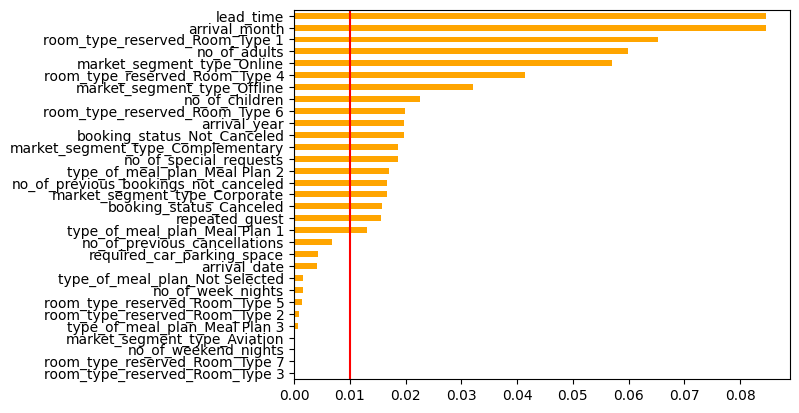

In [10]:
importances = mutual_info_classif(X, Y)
feature_importances = pd.Series(importances, dataset_labeled.columns[0:len(dataset_labeled.columns)-1]).sort_values(ascending = True)
feature_importances.plot(kind = 'barh', color = 'orange').axvline(x=0.01, color='r', linestyle='-')
plt.show()

Seleção de atributos pela técnica de Random Forest Importance

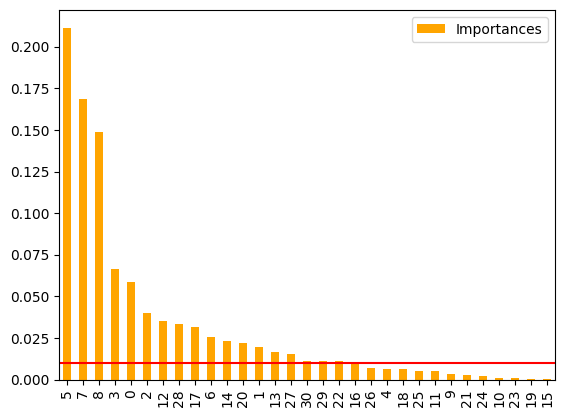

In [11]:
model = RandomForestClassifier(n_estimators=400)
model.fit(X, Y)

rf_importances = model.feature_importances_

result = pd.DataFrame({'Importances': rf_importances})
result.set_index('Importances')
result = result.sort_values("Importances", ascending=False)
result.plot.bar(color='orange').axhline(y=0.01, color='r', linestyle='-')

Seleção de atributos pela técnica de Correlation Coefficient (Pearson)

<Axes: >

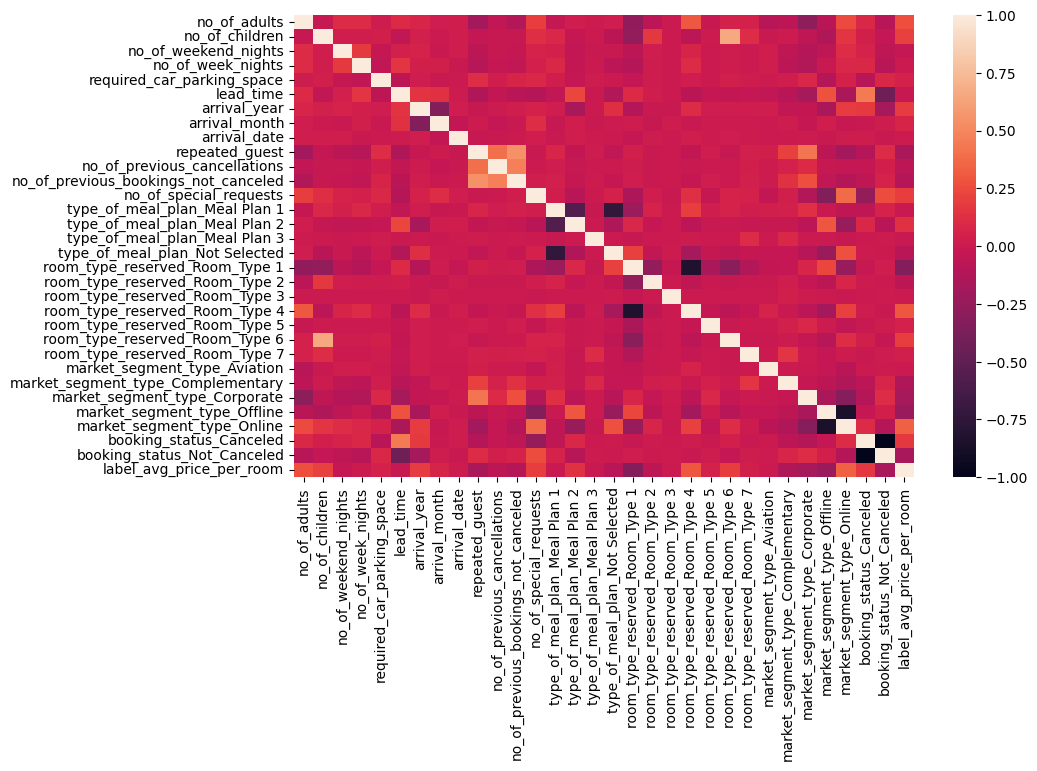

In [12]:
pearson_correlation = dataset_labeled.corr()
plt.figure(figsize=(10,6))
sns.heatmap(pearson_correlation)

In [13]:
pearson_correlation['label_avg_price_per_room'].sort_values(ascending=True)

room_type_reserved_Room_Type 1         -0.331724
market_segment_type_Offline            -0.232348
market_segment_type_Corporate          -0.176413
booking_status_Not_Canceled            -0.166523
repeated_guest                         -0.157091
market_segment_type_Complementary      -0.133540
no_of_previous_bookings_not_canceled   -0.101641
type_of_meal_plan_Not Selected         -0.091924
room_type_reserved_Room_Type 2         -0.069291
no_of_previous_cancellations           -0.065158
no_of_weekend_nights                   -0.032719
lead_time                              -0.020239
type_of_meal_plan_Meal Plan 1          -0.015119
type_of_meal_plan_Meal Plan 3          -0.009230
no_of_week_nights                      -0.005931
room_type_reserved_Room_Type 3         -0.005397
market_segment_type_Aviation           -0.003966
arrival_date                            0.006782
room_type_reserved_Room_Type 7          0.034234
room_type_reserved_Room_Type 5          0.048477
required_car_parking

Atributos candidatos a não serem selecionados


* Info Gain (< 0.01)
    - no_of_week_nights.
    - room_type_reserved_Room_Type 2.
    - required_car_parking_space
    - type_of_meal_plan_Meal Plan 1
    - type_of_meal_plan_Meal Plan 3
    - type_of_meal_plan_Not Selected
    - room_type_reserved_Room_Type 5
    - market_segment_type_Aviation
    - no_of_previous_cancellations
    - room_type_reserved_Room_Type 7
    - room_type_reserved_Room_Type 3
    - no_of_weekend_nights
* RF Importance (< 0.01)
    - required_car_parking_space
    - market_segment_type_Corporate
    - room_type_reserved_Room_Type 2
    - market_segment_type_Complementary
    - no_of_previous_bookings_not_canceled
    - repeated_guest
    - room_type_reserved_Room_Type 5
    - market_segment_type_Aviation
    - no_of_previous_cancellations
    - room_type_reserved_Room_Type 7
    - room_type_reserved_Room_Type 3
    - type_of_meal_plan_Meal Plan 3
* Pearson Correlation (< 0)
    - room_type_reserved_Room_Type 1
    - market_segment_type_Offline
    - market_segment_type_Corporate
    - booking_status_Not_Canceled
    - repeated_guest
    - market_segment_type_Complementary
    - no_of_previous_bookings_not_canceled
    - type_of_meal_plan_Not Selected
    - room_type_reserved_Room_Type 2
    - no_of_previous_cancellations
    - no_of_weekend_nights
    - lead_time
    - type_of_meal_plan_Meal Plan 1
    - type_of_meal_plan_Meal Plan 3
    - no_of_week_nights
    - room_type_reserved_Room_Type 3
    - market_segment_type_Aviation


In [14]:
from collections import Counter

ig = [
    'no_of_week_nights',
    'room_type_reserved_Room_Type 2',
    'required_car_parking_space',
    'type_of_meal_plan_Meal Plan 1',
    'type_of_meal_plan_Meal Plan 3',
    'type_of_meal_plan_Not Selected',
    'room_type_reserved_Room_Type 5',
    'market_segment_type_Aviation',
    'no_of_previous_cancellations',
    'room_type_reserved_Room_Type 7',
    'room_type_reserved_Room_Type 3',
    'no_of_weekend_nights'
]

rf = [
    'required_car_parking_space',
    'market_segment_type_Corporate',
    'room_type_reserved_Room_Type 2',
    'market_segment_type_Complementary',
    'no_of_previous_bookings_not_canceled',
    'repeated_guest',
    'room_type_reserved_Room_Type 5',
    'market_segment_type_Aviation',
    'no_of_previous_cancellations',
    'room_type_reserved_Room_Type 7',
    'room_type_reserved_Room_Type 3',
    'type_of_meal_plan_Meal Plan 3'
]

corr = [
    'room_type_reserved_Room_Type 1',
    'market_segment_type_Offline',
    'market_segment_type_Corporate',
    'booking_status_Not_Canceled',
    'repeated_guest',
    'market_segment_type_Complementary',
    'no_of_previous_bookings_not_canceled',
    'type_of_meal_plan_Not Selected',
    'room_type_reserved_Room_Type 2',
    'no_of_previous_cancellations',
    'no_of_weekend_nights',
    'lead_time',
    'type_of_meal_plan_Meal Plan 1',
    'type_of_meal_plan_Meal Plan 3',
    'no_of_week_nights',
    'room_type_reserved_Room_Type 3',
    'market_segment_type_Aviation'
]

combine = ig + rf + corr

removed_attrs = Counter(combine)
removed_attrs = Counter(attr for attr in removed_attrs.elements() if removed_attrs[attr] >= 2)
removed_attrs

Counter({'room_type_reserved_Room_Type 2': 3,
         'type_of_meal_plan_Meal Plan 3': 3,
         'market_segment_type_Aviation': 3,
         'no_of_previous_cancellations': 3,
         'room_type_reserved_Room_Type 3': 3,
         'no_of_week_nights': 2,
         'required_car_parking_space': 2,
         'type_of_meal_plan_Meal Plan 1': 2,
         'type_of_meal_plan_Not Selected': 2,
         'room_type_reserved_Room_Type 5': 2,
         'room_type_reserved_Room_Type 7': 2,
         'no_of_weekend_nights': 2,
         'market_segment_type_Corporate': 2,
         'market_segment_type_Complementary': 2,
         'no_of_previous_bookings_not_canceled': 2,
         'repeated_guest': 2})

In [15]:
print(f"Quantidade de atributos do dataset original: {len(dataset_labeled.columns)}")

atributos = []
for atributo in dataset_labeled.columns:    
    if atributo not in removed_attrs:
        atributos.append(atributo)

print(f"Quantidade de atributos do dataset após seleção de atributos: {len(atributos)}")

atributos

Quantidade de atributos do dataset original: 32
Quantidade de atributos do dataset após seleção de atributos: 16


['no_of_adults',
 'no_of_children',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'no_of_special_requests',
 'type_of_meal_plan_Meal Plan 2',
 'room_type_reserved_Room_Type 1',
 'room_type_reserved_Room_Type 4',
 'room_type_reserved_Room_Type 6',
 'market_segment_type_Offline',
 'market_segment_type_Online',
 'booking_status_Canceled',
 'booking_status_Not_Canceled',
 'label_avg_price_per_room']

## Upload do dataset modificado

Cria banco de dados para guardar dataset modificado caso não exista

In [56]:
dataset_labeled_modified = dataset_labeled_with_ids.drop(removed_attrs, axis = 1)
dataset_labeled_modified_json = json.loads(dataset_labeled_modified.to_json(orient = "records"), parse_float = Decimal)

boto3.setup_default_session()
client = boto3.client('dynamodb')
tables = client.list_tables()

if 'HotelReservationsModified' not in tables['TableNames']:
    print('Criando banco de dados no DynamoDB...')
    dynamodb = boto3.resource('dynamodb', aws_access_key_id=access_key, aws_secret_access_key=secret_key, aws_session_token=token, region_name = 'us-east-1')

    table = dynamodb.create_table(
        TableName ='HotelReservationsModified',
        KeySchema =
        [
            {
                'AttributeName': 'Booking_ID',
                'KeyType': 'HASH'
            }
        ],
        AttributeDefinitions =
        [
            {
                'AttributeName': 'Booking_ID',
                'AttributeType': 'S'
            }
        ],
        ProvisionedThroughput =
        {
            'ReadCapacityUnits': 5,
            'WriteCapacityUnits': 5
        }
    )

    table.meta.client.get_waiter('table_exists').wait(TableName = 'HotelReservationsModified')

    print('Criação do banco de dados concluído com sucesso.')

    dynamodbTable = dynamodb.Table('HotelReservationsModified')

    for record in tqdm(dataset_labeled_modified_json, desc='Uploading...'):
        dynamodbTable.put_item(Item = record)
    
    print('Upload do dataset modificado concluído com sucesso.')
else:
    print('Banco de dados já existe no DynamoDB.')

Criando banco de dados no DynamoDB...
Criação do banco de dados concluído com sucesso.


Uploading...: 100%|██████████| 36275/36275 [1:58:31<00:00,  5.10it/s]     

Upload do dataset modificado concluído com sucesso.


## Estatísticas do dataset modificado

In [62]:
dataset_labeled_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Booking_ID                      36275 non-null  object
 1   no_of_adults                    36275 non-null  int64 
 2   no_of_children                  36275 non-null  int64 
 3   lead_time                       36275 non-null  int64 
 4   arrival_year                    36275 non-null  int64 
 5   arrival_month                   36275 non-null  int64 
 6   arrival_date                    36275 non-null  int64 
 7   no_of_special_requests          36275 non-null  int64 
 8   type_of_meal_plan_Meal Plan 2   36275 non-null  bool  
 9   room_type_reserved_Room_Type 1  36275 non-null  bool  
 10  room_type_reserved_Room_Type 4  36275 non-null  bool  
 11  room_type_reserved_Room_Type 6  36275 non-null  bool  
 12  market_segment_type_Offline     36275 non-null

In [64]:
dataset_labeled_modified.isnull().sum()

Booking_ID                        0
no_of_adults                      0
no_of_children                    0
lead_time                         0
arrival_year                      0
arrival_month                     0
arrival_date                      0
no_of_special_requests            0
type_of_meal_plan_Meal Plan 2     0
room_type_reserved_Room_Type 1    0
room_type_reserved_Room_Type 4    0
room_type_reserved_Room_Type 6    0
market_segment_type_Offline       0
market_segment_type_Online        0
booking_status_Canceled           0
booking_status_Not_Canceled       0
label_avg_price_per_room          0
dtype: int64

In [66]:
dataset_labeled_modified.describe()

,no_of_adults,no_of_children,lead_time,arrival_year,arrival_month,arrival_date,no_of_special_requests,label_avg_price_per_room
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,85.232557,2017.820427,7.423653,15.596995,0.619655,2.021309
std,0.518715,0.402648,85.930817,0.383836,3.069894,8.740447,0.786236,0.790348
min,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,1.000000
25%,2.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,1.000000
50%,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,2.000000
75%,2.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,1.000000,3.000000
max,4.000000,10.000000,443.000000,2018.000000,12.000000,31.000000,5.000000,3.000000


In [68]:
dataset_labeled_modified['label_avg_price_per_room'].value_counts()

label_avg_price_per_room
2    13600
3    11724
1    10951
Name: count, dtype: int64